**

# Создадим телеграмм бота с кнопкой

ссылка на бот http://t.me/Deegrionbot

In [ ]:
!pip install pyTelegramBotAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:

import telebot
from telebot import types

bot = telebot.TeleBot('5605084812:AAGWH-AKjKpSt4zh3XkNzAaMPPGgeICPZgY') 

@bot.message_handler(commands=['start']) 
def start(message):
    markup = types.InlineKeyboardMarkup()
    button1 = types.InlineKeyboardButton("GitHub", url='https://github.com/deegrion/legendary-spoon.git')# нужно указать ссылку на гит хаб
    markup.add(button1)
    bot.send_message(message.chat.id, "Привет, {0.first_name}! Нажми на кнопку и перейди по ссылке)".format(message.from_user), reply_markup=markup)
bot.polling(none_stop=True)

#Проект по машинному обучению может быть не всегда последовательным, но обычно он имеет несколько выраженных этапов:

Постановка задачи

Подготовка данных

Оценка качества алгоритмов

Оптимизация результата

Презентация результата.

Представляю на Ваш суд небольшой проект  задачей которого является классификация цветов (на примере цветов ириса).


Это хороший проект, потому что он легко интерпретируется.

Атрибуты данных являются числовыми, так что вы должны разобраться, как загрузить и обрабатывать данные

Это проблема классификации, позволяющая практиковаться с, возможно, более простым типом контролируемого алгоритма обучения

Задача является многоклассовой классификацией и  может потребовать некоторой специализированной обработки

Выборка имеет только 4 атрибута и 150 строк, что означает, что она достаточно мала, легко будет обработана в операционном памяти локальном компьютера (и легко визуализировать на экране)

Все числовые атрибуты находятся в одном и том же масштабе и одинаковой шкале, не требуя специальной нормализации или масштабирования для начала работы

#Этапы проекта:

##Загрузка датасета:

Загружаем данные непосредственно из репозитория машинного обучения UCI.

##Анализ  датасета:

Анализ будем проводить несколькими способами:

Размерность датасета

Просмотр среза данных

Статистическая сводка атрибутов

Разбивка данных по атрибуту класса


##Визуализация данных:

рассмотрим два типа графиков:

Одномерные  графики, чтобы лучше понять каждый атрибут.

Многомерные графики, чтобы лучше понять взаимосвязь между атрибутами.

##Оценка алгоритмов машинного обучения:

Построим несколько различных моделей для прогнозирования класса цветка из измерений цветов

Выберем лучшую модель

Создадим график результатов оценки модели и сравним расхождение средней точность каждой модели

##Прогнозирование данных:
По результатам оценки моделей выбираем лучшую  и  используем ее в качестве нашей конечной модели.

##Оцениваем прогноз:

Мы видим, что точность 0,966 или около 96% на контрольной выборке.






In [20]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [52]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['длина чашелистика', 'ширина чашелистика', 'длина лепестка', 'ширина лепестка', 'Класс']
dataset = read_csv(url, names=names)
dataset

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,Класс
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
print(dataset.shape)

(150, 5)


In [36]:
print(dataset.head(20))# Срез данных head

    длина чашелистика  ширина чашелистика  длина лепестка  ширина лепестка  \
0                 5.1                 3.5             1.4              0.2   
1                 4.9                 3.0             1.4              0.2   
2                 4.7                 3.2             1.3              0.2   
3                 4.6                 3.1             1.5              0.2   
4                 5.0                 3.6             1.4              0.2   
5                 5.4                 3.9             1.7              0.4   
6                 4.6                 3.4             1.4              0.3   
7                 5.0                 3.4             1.5              0.2   
8                 4.4                 2.9             1.4              0.2   
9                 4.9                 3.1             1.5              0.1   
10                5.4                 3.7             1.5              0.2   
11                4.8                 3.4             1.6       

In [37]:
print(dataset.describe())# Стастические сводка методом describe

       длина чашелистика  ширина чашелистика  длина лепестка  ширина лепестка
count         150.000000          150.000000      150.000000       150.000000
mean            5.843333            3.054000        3.758667         1.198667
std             0.828066            0.433594        1.764420         0.763161
min             4.300000            2.000000        1.000000         0.100000
25%             5.100000            2.800000        1.600000         0.300000
50%             5.800000            3.000000        4.350000         1.300000
75%             6.400000            3.300000        5.100000         1.800000
max             7.900000            4.400000        6.900000         2.500000


In [39]:
print(dataset.groupby('Класс').size())# Распределение по атрибуту class

Класс
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


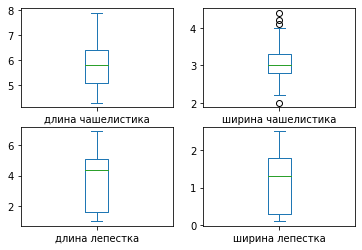

In [60]:

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)#Диаграмма размаха атрибутов входных данных
pyplot.show()


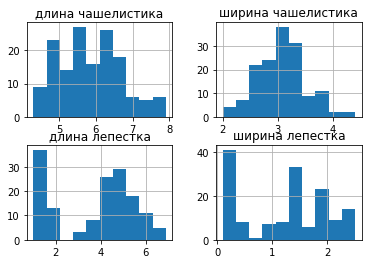

In [41]:
dataset.hist()#Гистограммы входных данных атрибутов датасета
pyplot.show()

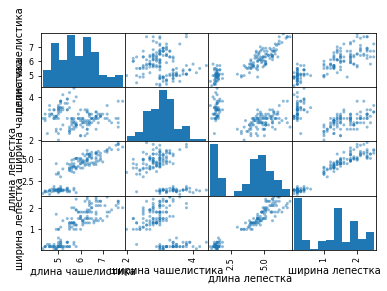

In [42]:
scatter_matrix(dataset)#Матрица диаграмм рассеяния
pyplot.show()

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


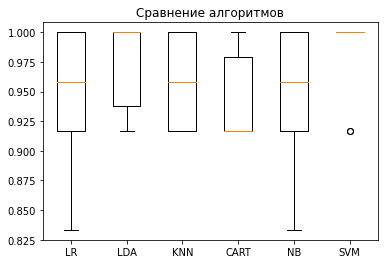

In [53]:
array = dataset.values

# Выбор первых 4-х столбцов 
X = array[:,0:4]

# Выбор 5-го столбца 
y = array[:,4]

# Разделение X и y на обучающую и контрольную выборки 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Загружаем алгоритмы моделей
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# оцениваем модель на каждой итерации
results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Сравниванием алгоритмы
pyplot.boxplot(results, labels=names)
pyplot.title('Сравнение алгоритмов')
pyplot.show()

In [44]:
# Разделение датасета на обучающую и контрольную выборки
array = dataset.values


X = array[:,0:4]


y = array[:,4]

# Разделение X и y на обучающую и контрольную выборки 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Создаем прогноз на контрольной выборке
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Оцениваем прогноз
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

